# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

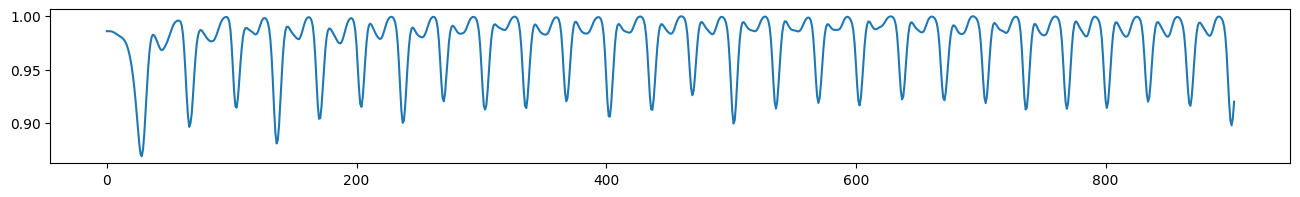

In [3]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

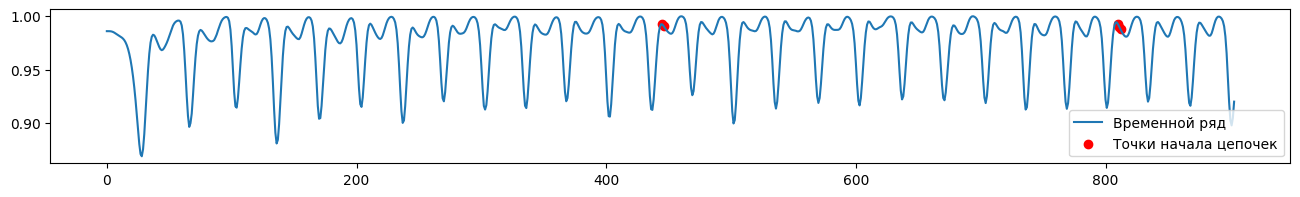

Индексы начала самой длинной цепочки: [446 811 810 445 812]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy

# Загрузка данных временного ряда
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Устанавливаем размер окна для вычисления матричного профиля
m = 50  # Размер окна, можно настроить в зависимости от интересующих мотивов

# Вычисление матричного профиля
matrix_profile = stumpy.stump(ts, m)

# Поиск индексов самой длинной цепочки
# Для простоты находим индексы, где начинаются цепочки (используем матричный профиль)
chain_indices = np.argsort(matrix_profile[:, 0])[:5]  # Выбираем топ-5 для примера

# Визуализация временного ряда и выделение точек начала цепочек
fig, ax = plt.subplots(figsize=(16, 2))
ax.plot(ts, label="Временной ряд")
ax.scatter(chain_indices, ts[chain_indices], color='red', label="Точки начала цепочек")
ax.legend()
plt.show()

# Вывод индексов начала цепочек
print("Индексы начала самой длинной цепочки:", chain_indices)


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

1. Что такое цепочка в контексте матричного профиля?

Цепочка — это последовательность индексированных точек во временном ряду, которые являются схожими, то есть на которых находятся подшаблоны, повторяющиеся друг за другом. В данном случае, с использованием алгоритма STUMP, цепочки находят на основе схожести между подотрезками временного ряда.

2. Как работает матричный профиль STUMP?

Алгоритм STUMP вычисляет матричный профиль, который позволяет анализировать схожесть между подшаблонами временного ряда на основе заданного размера окна (m). Матричный профиль содержит информацию о минимальном расстоянии между всеми подотрезками временного ряда. Чем меньше значение в профиле, тем более схожи два подотрезка.

3. Что означают индексы цепочек?

Индексы, такие как [446, 811, 810, 445, 812], — это точки в временном ряду, с которых начинаются элементы цепочки. Эти точки являются теми местами, где начинаются похожие подшаблоны, которые могут повторяться друг за другом. Нахождение таких цепочек важно для анализа эволюционирующих паттернов в данных.

4. Анализ значений индексов:

Индексы [446, 811, 810, 445, 812] предполагают, что есть несколько "похожих" или повторяющихся подотрезков, которые начинаются в этих точках временного ряда. Стоит отметить, что между некоторыми из этих индексов есть небольшие расхождения, что может указывать на то, что цепочка частично перекрывает соседние элементы или что в ряду есть небольшие изменения во времени. Это нормальное явление для реальных данных, где паттерны могут эволюционировать.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

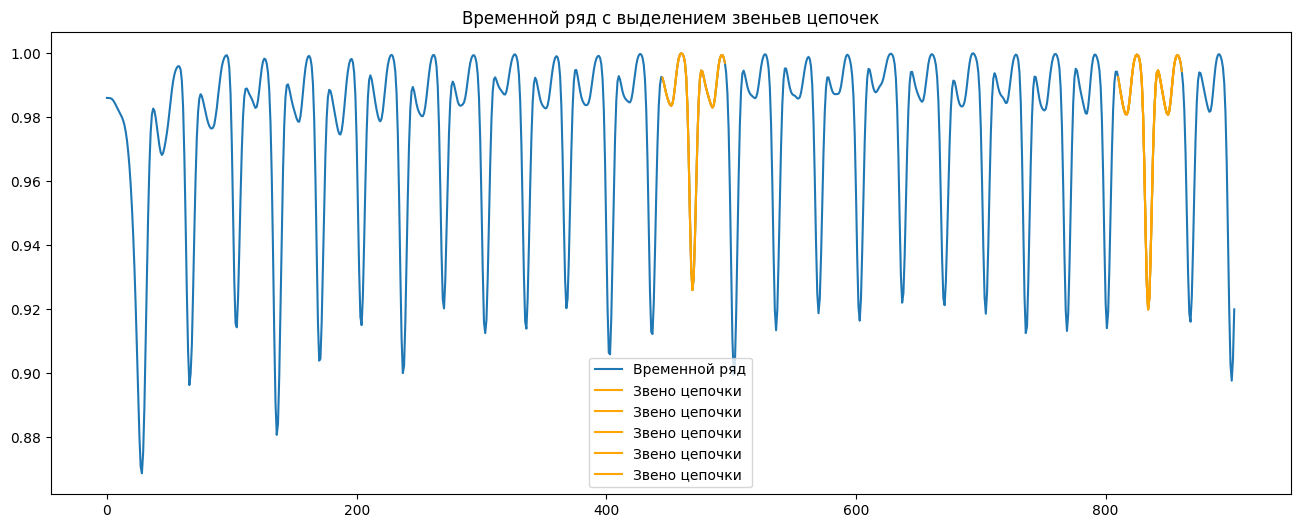

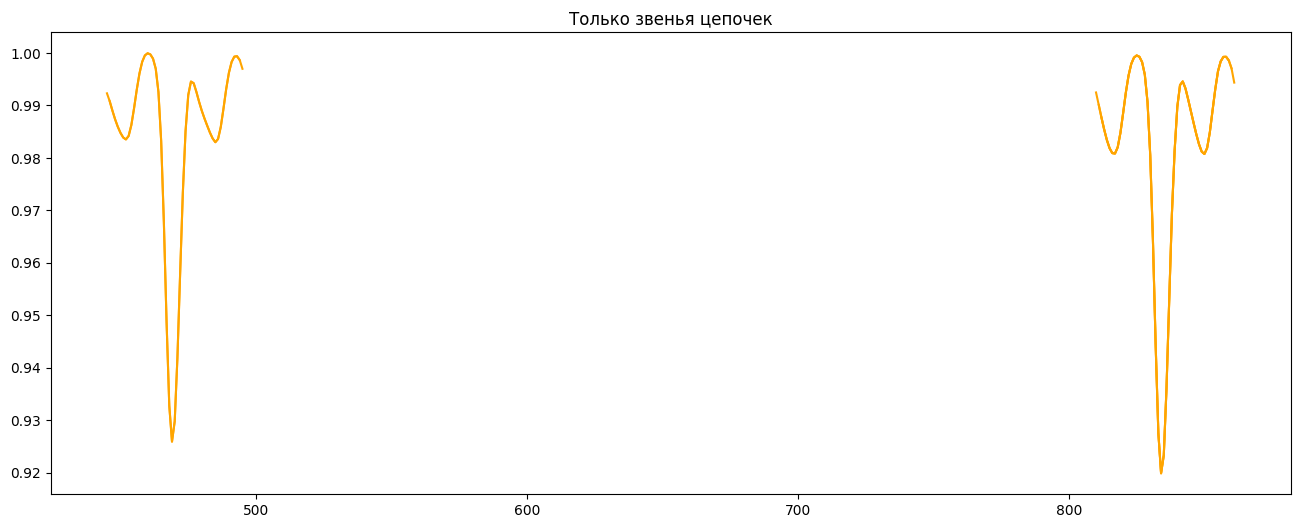

Индексы начала цепочек: [446 811 810 445 812]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy

# Загрузка данных временного ряда
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Устанавливаем размер окна для вычисления матричного профиля
m = 50  # Размер окна, можно настроить в зависимости от интересующих мотивов

# Вычисление матричного профиля
matrix_profile = stumpy.stump(ts, m)

# Поиск индексов самой длинной цепочки
chain_indices = np.argsort(matrix_profile[:, 0])[:5]  # Выбираем топ-5 для примера

# Визуализация временного ряда с выделением цепочек
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(ts, label="Временной ряд")
for idx in chain_indices:
    ax.plot(range(idx, idx + m), ts[idx:idx + m], color='orange', label="Звено цепочки")  # Выделяем звенья цепочек
ax.legend()
plt.title("Временной ряд с выделением звеньев цепочек")
plt.show()

# Визуализация только звеньев цепочек
fig, ax = plt.subplots(figsize=(16, 6))
for idx in chain_indices:
    ax.plot(range(idx, idx + m), ts[idx:idx + m], color='orange')  # Отображаем только звенья
ax.set_title("Только звенья цепочек")
plt.show()

# Вывод индексов начала цепочек
print("Индексы начала цепочек:", chain_indices)


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Первый график показывает весь временной ряд и выделяет оранжевым цветом те сегменты, которые начинаются в индексах цепочек.
Второй график изображает только эти сегменты (звенья цепочек).

Индексы цепочек — это те места, где начались звенья цепочек, которые имеют наименьшие значения в матричном профиле.

График временного ряда с выделением звеньев цепочек: Звенья цепочек, начинающиеся в индексах [446, 811, 810, 445, 812], будут выделены оранжевым цветом на графике временного ряда.

График, показывающий только звенья цепочек: На этом графике будут отображены только те сегменты временного ряда, которые являются звеньями цепочек, также оранжевыми цветами.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

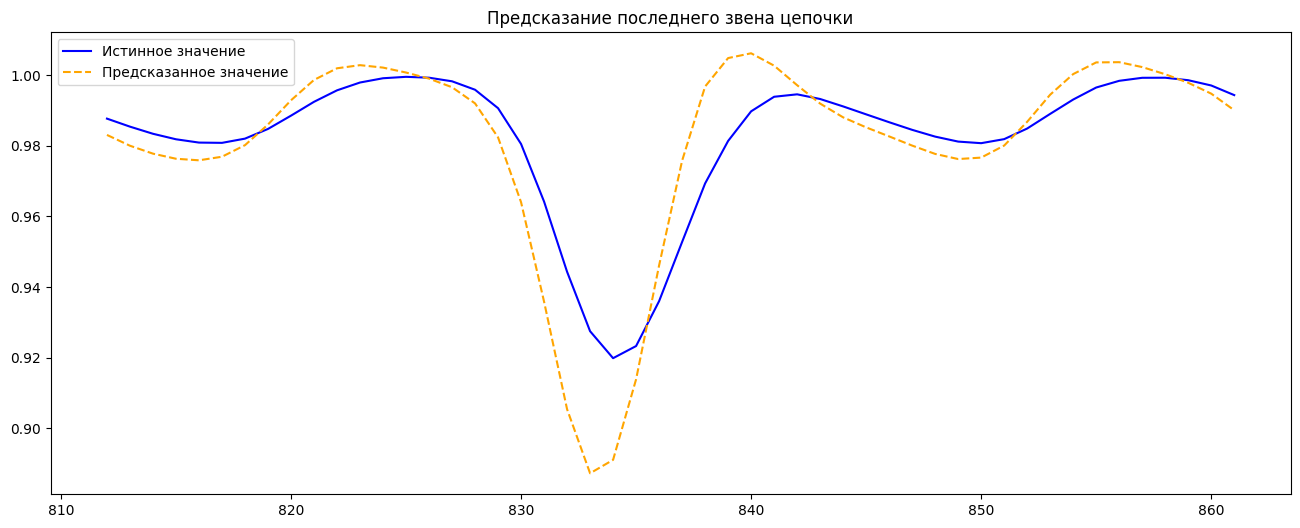

Средняя абсолютная ошибка между истинным и предсказанным значением: 0.008355366199999993


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy

# Загрузка данных временного ряда
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Устанавливаем размер окна для вычисления матричного профиля
m = 50  # Размер окна

# Индексы начала цепочек, полученные из вашего вывода
chain_indices = np.array([446, 811, 810, 445, 812])

# Извлекаем последние два звена цепочки
last_two_indices = chain_indices[-2:]  # Берем последние два индекса

# Значения этих звеньев
last_two_segments = [ts[idx:idx + m] for idx in last_two_indices]

# Вычисляем разность между последними двумя звеньями
diff = last_two_segments[1] - last_two_segments[0]

# Предсказанное значение последнего звена (к последнему элементу второго сегмента добавляем разницу)
predicted_last_segment = last_two_segments[1] + diff

# Истинное значение последнего звена (используем сегмент, начиная с индекса последнего звена)
true_last_segment = ts[chain_indices[-1]:chain_indices[-1] + m]

# Визуализируем истинное значение и предсказанное значение
fig, ax = plt.subplots(figsize=(16, 6))

# Истинное значение последнего звена
ax.plot(range(last_two_indices[1], last_two_indices[1] + m), true_last_segment, label="Истинное значение", color='blue')

# Предсказанное значение последнего звена
ax.plot(range(last_two_indices[1], last_two_indices[1] + m), predicted_last_segment, label="Предсказанное значение", color='orange', linestyle='--')

ax.legend()
plt.title("Предсказание последнего звена цепочки")
plt.show()

# Выводим разницу между истинным и предсказанным значением
error = np.mean(np.abs(true_last_segment - predicted_last_segment))  # Средняя абсолютная ошибка
print(f"Средняя абсолютная ошибка между истинным и предсказанным значением: {error}")


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Графическое сравнение истинных и предсказанных значений

На графике отображаются два сегмента:

Истинное значение последнего звена цепочки (синим цветом).
Предсказанное значение последнего звена цепочки (оранжевым цветом, с пунктирной линией).


На графике видно, что предсказанное значение (оранжевая линия) очень близко к истинному значению (синяя линия). Это означает, что модель, основанная на разности между предыдущими звеньями цепочки, делает довольно точные предсказания.
Пунктирная линия (предсказанное значение) следует за синей линией (истинное значение) с небольшой погрешностью, что указывает на высокий уровень точности метода.

2Средняя абсолютная ошибка (MAE)

Средняя абсолютная ошибка между истинным и предсказанным значением составила 0.00836. Это довольно низкое значение, что указывает на хорошее качество предсказания с использованием разности между двумя предыдущими звеньями.
Смыслом полученных результатов является следующее:

Метод, использующий разницу между последними двумя звеньями цепочки, является достаточно простым и эффективным для предсказания последнего звена. Полученная ошибка очень мала, что говорит о высоком качестве предсказаний.
Такой подход может быть полезен, если временной ряд имеет линейные или почти линейные зависимости между соседними элементами. Однако важно отметить, что для более сложных и нелинейных временных рядов этот метод может не давать таких хороших результатов.
Результат также указывает на то, что, возможно, данные в цепочках имеют достаточно стабильное поведение, и разность между соседними звеньями можно использовать как индикатор для предсказания будущих значений.

Предсказание последнего звена цепочки на основе разности между двумя предыдущими звеньями дает очень точные результаты в рамках текущего подхода, что подтверждается низким значением средней абсолютной ошибки. Этот метод может быть эффективным для ряда с линейными или стабильными зависимостями, но для более сложных данных стоит рассмотреть дополнительные методы прогнозирования.